# German Credit Data

## 1. Problem Definition

1) Analyze the characteristics of the customers who take a credit by a bank.
2) Conduct a customer segmentation  

#### Data Source: https://www.kaggle.com/uciml/german-credit?select=german_credit_data.csv

## 2. Read libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 3. Load Data & Data Exploration

In [2]:
df=pd.read_csv('./german_credit_data.csv')

In [3]:
df.head() # return top 5 rows of a data frame

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,unnamed:_0,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
# Delete an unnessary column
df1 = df.drop(['unnamed:_0'], axis=1)

In [6]:
df1.shape # find the number of rows and columns

(1000, 10)

In [7]:
df1.info() # check data types and null numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   int64 
 3   housing           1000 non-null   object
 4   saving_accounts   817 non-null    object
 5   checking_account  606 non-null    object
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   purpose           1000 non-null   object
 9   risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [8]:
df1.nunique() #Check unique values

age                  53
sex                   2
job                   4
housing               3
saving_accounts       4
checking_account      3
credit_amount       921
duration             33
purpose               8
risk                  2
dtype: int64

In [9]:
# List unique values in each categorical variables
print("Sex: ", df1.sex.unique())
print("Job: ", df1.job.unique())
print("Housing", df1.housing.unique())
print("Saving Accounts: ", df1.saving_accounts.unique())
print("Checking Account: ", df1.checking_account.unique())
print("Purpose: ", df1.purpose.unique())
print("Risk: ", df1.risk.unique())

Sex:  ['male' 'female']
Job:  [2 1 3 0]
Housing ['own' 'free' 'rent']
Saving Accounts:  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking Account:  ['little' 'moderate' nan 'rich']
Purpose:  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk:  ['good' 'bad']


In [10]:
df1.loc[(df1['job'] == 0), 'job'] = 'unskilled and non-resident'
df1.loc[(df1['job'] == 1), 'job'] = 'unskilled and resident'
df1.loc[(df1['job'] == 2), 'job'] = 'skilled'
df1.loc[(df1['job'] == 3), 'job'] = 'highly skilled'

print("Job: ", df1.job.unique())

Job:  ['skilled' 'unskilled and resident' 'highly skilled'
 'unskilled and non-resident']


In [11]:
df1.describe()

,age,credit_amount,duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


good    700
bad     300
Name: risk, dtype: int64


Text(0.5, 1.0, 'Risk Distribution')

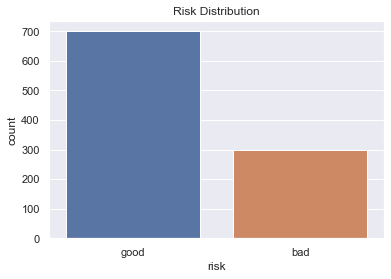

In [12]:
# Risk Segments
from termcolor import colored as cl # text customization

print(cl(df1['risk'].value_counts(), attrs = ['bold']))
sns.countplot(x='risk', data=df1)
plt.title('Risk Distribution')

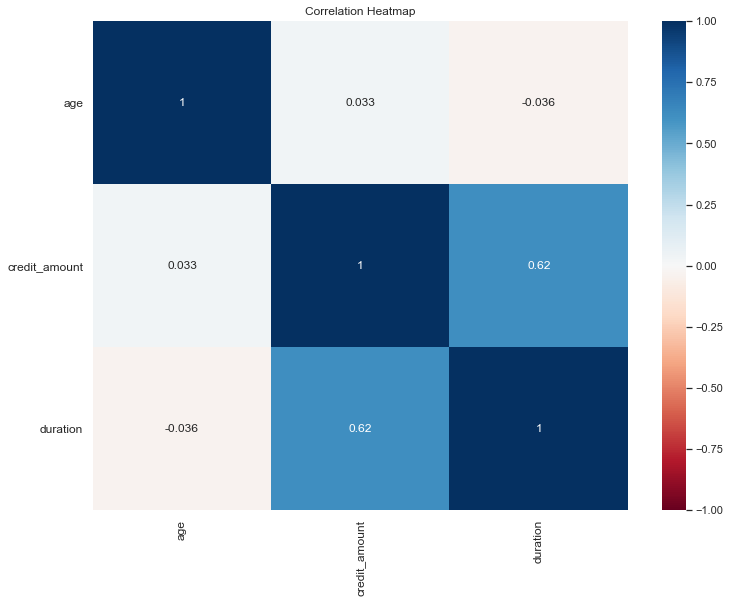

In [13]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df1.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64


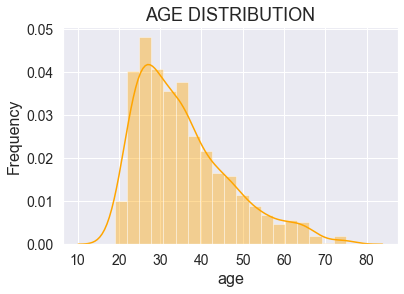

In [14]:
from termcolor import colored as cl # text customization
import seaborn as sb # visualization
# Age distribution

print(cl(df1['age'].describe(), attrs = ['bold']))

sb.distplot(df1['age'], 
            color = 'orange')
plt.title('AGE DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#plt.savefig('age_distribution.png')
plt.show()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64


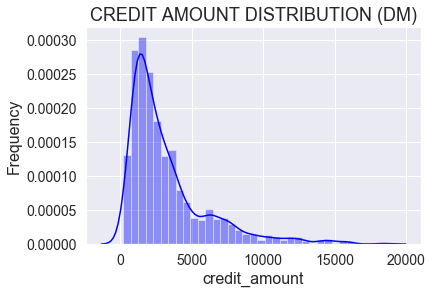

In [15]:
# Credit amount distribution

print(cl(df1['credit_amount'].describe(), attrs = ['bold']))

sb.distplot(df1['credit_amount'], 
            color = 'blue')
plt.title('CREDIT AMOUNT DISTRIBUTION (DM)', 
          fontsize = 18)
plt.xlabel('credit_amount', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#plt.savefig('age_distribution.png')
plt.show()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64


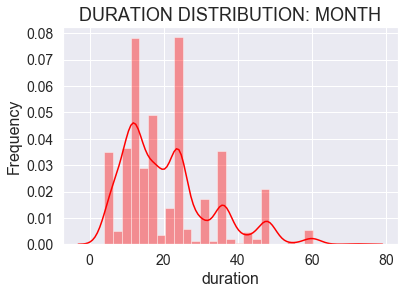

In [16]:
# Duration distribution

print(cl(df1['duration'].describe(), attrs = ['bold']))

sb.distplot(df1['duration'], 
            color = 'red')
plt.title('DURATION DISTRIBUTION: MONTH', 
          fontsize = 18)
plt.xlabel('duration', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#plt.savefig('age_distribution.png')
plt.show()

In [17]:
# Crosstab: sex by Risk
sex_count = pd.crosstab(df1.sex, df1.risk, margins=True, margins_name="Total")
sex_percentage = pd.crosstab(df1.sex, df1.risk, normalize='columns',margins=True, margins_name="Total").round(3)*100
print("sex_count")
print(sex_count)
print("sex_percentage")
print(sex_percentage)

sex_count
risk    bad  good  Total
sex                     
female  109   201    310
male    191   499    690
Total   300   700   1000
sex_percentage
risk     bad  good  Total
sex                      
female  36.3  28.7   31.0
male    63.7  71.3   69.0


In [18]:
# Crosstab: Job by Risk
job_count = pd.crosstab(df1.job, df1.risk, margins=True, margins_name="Total")
job_percentage = pd.crosstab(df1.job, df1.risk, normalize='columns',margins=True, margins_name="Total").round(3)*100
print("job_count")
print(job_count)
print("job_percentage")
print(job_percentage)

job_count
risk                        bad  good  Total
job                                         
highly skilled               51    97    148
skilled                     186   444    630
unskilled and non-resident    7    15     22
unskilled and resident       56   144    200
Total                       300   700   1000
job_percentage
risk                         bad  good  Total
job                                          
highly skilled              17.0  13.9   14.8
skilled                     62.0  63.4   63.0
unskilled and non-resident   2.3   2.1    2.2
unskilled and resident      18.7  20.6   20.0


In [19]:
# Crosstab: Housing by Risk
housing_count = pd.crosstab(df1.housing, df1.risk, margins=True, margins_name="Total")
housing_percentage = pd.crosstab(df1.housing, df1.risk, normalize='columns',margins=True, margins_name="Total").round(3)*100
print("housing_count")
print(housing_count)
print("housing_percentage")
print(housing_percentage)

housing_count
risk     bad  good  Total
housing                  
free      44    64    108
own      186   527    713
rent      70   109    179
Total    300   700   1000
housing_percentage
risk      bad  good  Total
housing                   
free     14.7   9.1   10.8
own      62.0  75.3   71.3
rent     23.3  15.6   17.9


In [20]:
# Crosstab: Purpose by Risk
purpose_count = pd.crosstab(df1.purpose, df1.risk, margins=True, margins_name="Total")
purpose_percentage = pd.crosstab(df1.purpose, df1.risk, normalize='columns',margins=True, margins_name="Total").round(3)*100
print("purpose_count")
print(purpose_count)
print("purpose_percentage")
print(purpose_percentage)

purpose_count
risk                 bad  good  Total
purpose                              
business              34    63     97
car                  106   231    337
domestic appliances    4     8     12
education             23    36     59
furniture/equipment   58   123    181
radio/TV              62   218    280
repairs                8    14     22
vacation/others        5     7     12
Total                300   700   1000
purpose_percentage
risk                  bad  good  Total
purpose                               
business             11.3   9.0    9.7
car                  35.3  33.0   33.7
domestic appliances   1.3   1.1    1.2
education             7.7   5.1    5.9
furniture/equipment  19.3  17.6   18.1
radio/TV             20.7  31.1   28.0
repairs               2.7   2.0    2.2
vacation/others       1.7   1.0    1.2


In [21]:
# Crosstab: Saving Accounts by Risk
saving_count = pd.crosstab(df1.saving_accounts, df1.risk, margins=True, margins_name="Total")
saving_percentage = pd.crosstab(df1.saving_accounts, df1.risk, normalize='columns',margins=True, margins_name="Total").round(3)*100
print("saving_count")
print(saving_count)
print("saving_percentage")
print(saving_percentage)


saving_count
risk             bad  good  Total
saving_accounts                  
little           217   386    603
moderate          34    69    103
quite rich        11    52     63
rich               6    42     48
Total            268   549    817
saving_percentage
risk              bad  good  Total
saving_accounts                   
little           81.0  70.3   73.8
moderate         12.7  12.6   12.6
quite rich        4.1   9.5    7.7
rich              2.2   7.7    5.9


In [22]:
# Crosstab: check Accounts by Risk
check_count = pd.crosstab(df1.checking_account, df1.risk, margins=True, margins_name="Total")
check_percentage = pd.crosstab(df1.checking_account, df1.risk, normalize='columns',margins=True, margins_name="Total").round(3)*100
print("check_count")
print(check_count)
print("check_percentage")
print(check_percentage)

check_count
risk              bad  good  Total
checking_account                  
little            135   139    274
moderate          105   164    269
rich               14    49     63
Total             254   352    606
check_percentage
risk               bad  good  Total
checking_account                   
little            53.1  39.5   45.2
moderate          41.3  46.6   44.4
rich               5.5  13.9   10.4


In [23]:
pd.pivot_table(df1, index='risk', aggfunc='mean').round(2)

,age,credit_amount,duration
risk,,,
bad,33.96,3938.13,24.86
good,36.22,2985.46,19.21


## 4. Categorical Feature Encoding & Standardization

In [24]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [25]:
# find categorical variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   object
 3   housing           1000 non-null   object
 4   saving_accounts   817 non-null    object
 5   checking_account  606 non-null    object
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   purpose           1000 non-null   object
 9   risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [26]:
X_ohe = ohe.fit_transform(df1[['sex','job','housing','saving_accounts','checking_account','purpose','risk']])

In [27]:
X_ohe[1]

array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [28]:
ohe_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names())
#concat with original data

data = pd.concat([df1, ohe_df], axis=1)
data.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,...,x5_business,x5_car,x5_domestic appliances,x5_education,x5_furniture/equipment,x5_radio/TV,x5_repairs,x5_vacation/others,x6_bad,x6_good
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,good,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,53,male,skilled,free,little,little,4870,24,car,bad,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
#Standardization
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(data[['age','credit_amount','duration']]))

In [30]:
df_scaler

,0,1,2
0,2.766456,-0.745131,-1.236478
1,-1.191404,0.949817,2.248194
2,1.183312,-0.416562,-0.738668
3,0.831502,1.634247,1.750384
4,1.535122,0.566664,0.256953
...,...,...,...
995,-0.399832,-0.544162,-0.738668
996,0.391740,0.207612,0.754763
997,0.215835,-0.874503,-0.738668
998,-1.103451,-0.505528,1.999289


In [31]:
#Combine data sets
data_seg = pd.concat([ohe_df,df_scaler], axis=1)
data_seg.head()

,x0_female,x0_male,x1_highly skilled,x1_skilled,x1_unskilled and non-resident,x1_unskilled and resident,x2_free,x2_own,x2_rent,x3_little,...,x5_education,x5_furniture/equipment,x5_radio/TV,x5_repairs,x5_vacation/others,x6_bad,x6_good,0,1,2
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.766456,-0.745131,-1.236478
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.191404,0.949817,2.248194
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.183312,-0.416562,-0.738668
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.831502,1.634247,1.750384
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.535122,0.566664,0.256953


In [32]:
data_seg = data_seg.rename(columns = {0: 'age', 1: 'credit_amount', 2:'duration'
                                    })

In [33]:
data_seg.head()

,x0_female,x0_male,x1_highly skilled,x1_skilled,x1_unskilled and non-resident,x1_unskilled and resident,x2_free,x2_own,x2_rent,x3_little,...,x5_education,x5_furniture/equipment,x5_radio/TV,x5_repairs,x5_vacation/others,x6_bad,x6_good,age,credit_amount,duration
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.766456,-0.745131,-1.236478
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.191404,0.949817,2.248194
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.183312,-0.416562,-0.738668
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.831502,1.634247,1.750384
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.535122,0.566664,0.256953


## 5. Segmentation

In [34]:
# K-means
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_seg)
    wcss.append(kmeans.inertia_)

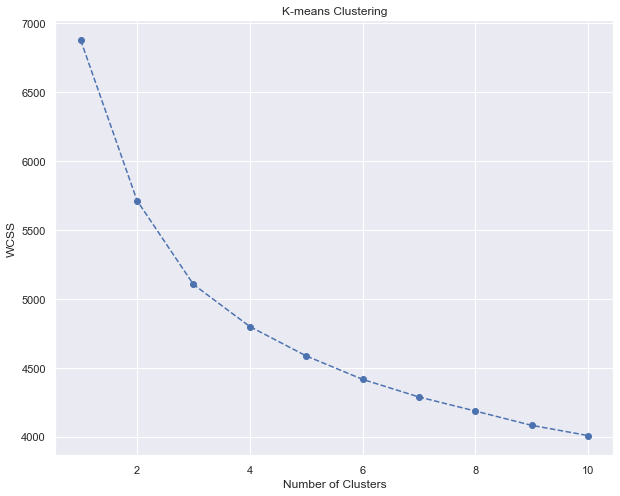

In [35]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [36]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [37]:
kmeans.fit(data_seg)

KMeans(n_clusters=4, random_state=42)

In [38]:
df_segm_kmeans = df1.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [39]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,age,credit_amount,duration
Segment K-means,,,
0,52.352657,2309.599034,15.922705
1,31.227500,2382.400000,17.567500
2,27.837838,2150.693694,16.896396
3,35.309942,7969.339181,39.935673


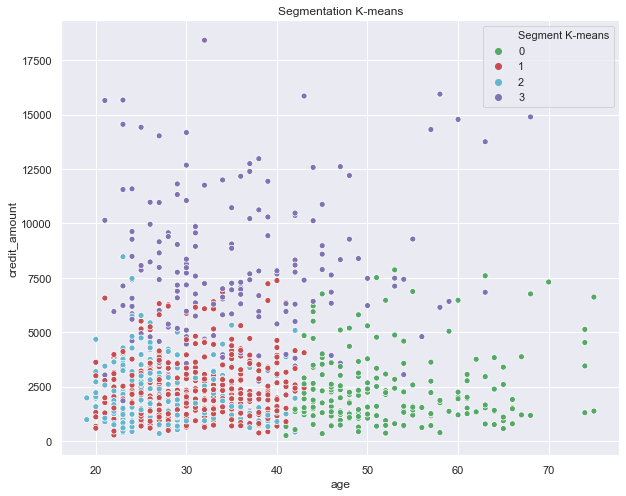

In [40]:
x_axis = df_segm_kmeans['age']
y_axis = df_segm_kmeans['credit_amount']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Segment K-means'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

#### PCA

In [41]:
pca = PCA()

In [42]:
# Fit PCA with our standardized data.
pca.fit(data_seg)

PCA()

In [43]:
pca.explained_variance_ratio_

array([2.46345590e-01, 1.56164756e-01, 8.18159217e-02, 6.51069573e-02,
       5.96774840e-02, 4.87496963e-02, 4.56650477e-02, 4.13326304e-02,
       3.84138351e-02, 3.51954348e-02, 3.15020668e-02, 2.89622745e-02,
       2.13921436e-02, 1.84573226e-02, 1.59438364e-02, 1.54270539e-02,
       1.11949223e-02, 1.05840915e-02, 9.10504793e-03, 7.49701506e-03,
       4.25205686e-03, 3.50337494e-03, 2.08088127e-03, 1.63055927e-03,
       9.02753317e-32, 6.55807477e-32, 2.87096657e-32, 8.98923540e-33,
       4.12244483e-33, 1.12068263e-33, 1.96529110e-34])

Text(0, 0.5, 'Cumulative Explained Variance')

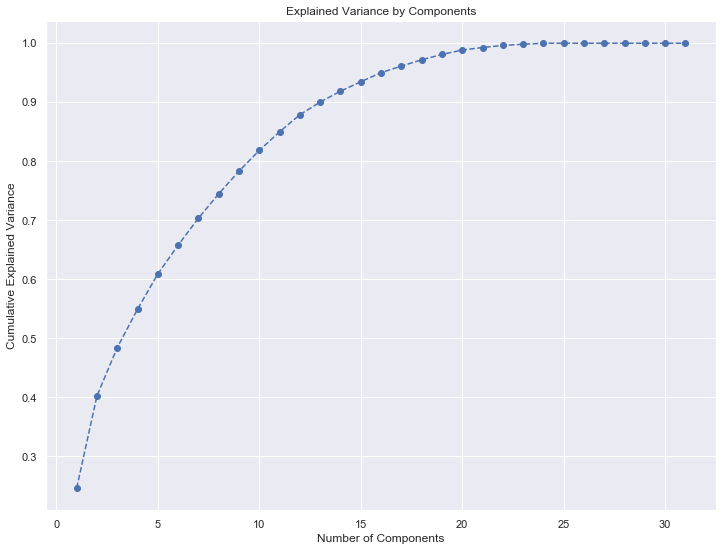

In [44]:
plt.figure(figsize = (12,9))
plt.plot(range(1,32), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [45]:
pca = PCA(n_components = 10)

In [46]:
pca.fit(data_seg)

PCA(n_components=10)

In [47]:
pca.components_

array([[-4.37898575e-02,  4.37898575e-02,  7.89855511e-02,
        -1.16597677e-02, -3.84585701e-03, -6.34799264e-02,
         6.00467408e-02, -4.75795942e-02, -1.24671466e-02,
        -1.66467191e-02,  9.94509524e-03, -1.23083092e-02,
        -1.06365485e-02,  2.96464816e-02,  7.52796999e-03,
         4.87542335e-02, -1.91607977e-02, -3.71214058e-02,
         3.55093980e-02,  3.46484159e-02, -4.94187344e-03,
        -4.97804470e-03, -1.83577668e-02, -5.32244784e-02,
        -2.95300648e-03,  1.42973559e-02,  9.59105990e-02,
        -9.59105990e-02,  9.60000874e-03,  6.91716723e-01,
         6.86416086e-01],
       [-1.27484311e-01,  1.27484311e-01,  6.03169596e-02,
        -9.73500745e-02,  7.99090398e-03,  2.90422110e-02,
         7.93605752e-02,  2.36753046e-02, -1.03035880e-01,
        -4.34434095e-02, -2.20373943e-02,  1.09002395e-02,
         7.26953762e-03,  4.73110266e-02, -2.79207028e-02,
        -4.67655820e-02,  9.11319201e-03,  6.55730928e-02,
        -1.72953534e-03,  7.17

In [48]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data_seg.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5','Component 6','Component 7','Component 8','Component 9','Component 10'])
df_pca_comp

,x0_female,x0_male,x1_highly skilled,x1_skilled,x1_unskilled and non-resident,x1_unskilled and resident,x2_free,x2_own,x2_rent,x3_little,...,x5_education,x5_furniture/equipment,x5_radio/TV,x5_repairs,x5_vacation/others,x6_bad,x6_good,age,credit_amount,duration
Component 1,-0.043790,0.043790,0.078986,-0.011660,-0.003846,-0.063480,0.060047,-0.047580,-0.012467,-0.016647,...,-0.004978,-0.018358,-0.053224,-0.002953,0.014297,0.095911,-0.095911,0.009600,0.691717,0.686416
Component 2,-0.127484,0.127484,0.060317,-0.097350,0.007991,0.029042,0.079361,0.023675,-0.103036,-0.043443,...,0.011679,-0.064783,-0.024951,0.005250,0.005107,-0.087643,0.087643,0.943614,0.051779,-0.072443
Component 3,0.174680,-0.174680,0.044877,-0.143891,0.018153,0.080860,0.072907,-0.201362,0.128455,0.298733,...,0.022657,0.066651,-0.146008,0.005009,0.005851,0.431399,-0.431399,0.174151,-0.047942,-0.098458
Component 4,0.232052,-0.232052,0.168233,-0.287387,0.018313,0.100840,0.014953,-0.185272,0.170319,-0.110920,...,0.000784,0.018637,-0.229450,-0.008180,0.013258,-0.151691,0.151691,-0.095151,0.499710,-0.485656
Component 5,-0.553192,0.553192,0.099489,-0.225799,-0.007498,0.133808,-0.025018,0.174595,-0.149577,0.175917,...,-0.030808,-0.028660,-0.075854,0.005500,0.009663,0.035752,-0.035752,-0.206069,0.178018,-0.270925
Component 6,0.212872,-0.212872,0.118511,-0.463174,0.011629,0.333034,-0.142893,0.356000,-0.213107,0.144139,...,0.003790,-0.029403,0.276235,0.008714,0.018939,-0.058585,0.058585,0.024593,0.013604,0.090932
Component 7,-0.073195,0.073195,-0.012772,-0.114890,0.018073,0.109588,0.027586,-0.094771,0.067185,-0.587718,...,0.019649,-0.195199,-0.043975,0.007449,-0.003203,0.195003,-0.195003,-0.011101,-0.208952,0.063284
Component 8,0.041182,-0.041182,-0.095740,0.474077,-0.010341,-0.367996,-0.051564,0.170459,-0.118895,-0.005040,...,0.001971,0.071981,0.138731,0.007632,0.009242,0.109883,-0.109883,0.091050,0.338494,-0.378419
Component 9,0.136583,-0.136583,-0.022299,0.042339,-0.001299,-0.018742,-0.163986,0.541262,-0.377276,-0.073230,...,-0.015935,-0.111996,-0.211709,-0.001444,-0.009827,0.286128,-0.286128,-0.025722,0.012490,-0.038093
Component 10,-0.107602,0.107602,0.056067,-0.135212,-0.022136,0.101282,0.013926,-0.172927,0.159000,-0.119784,...,0.039033,-0.004589,0.356017,0.001384,0.001456,0.354325,-0.354325,-0.003397,0.131373,-0.168955


In [49]:
pca.transform(data_seg)

array([[-1.39629818,  2.75971286,  0.03065533, ...,  0.72411909,
        -0.24085128,  0.15505937],
       [ 2.22923996, -1.67950919,  0.35003427, ...,  0.47072843,
         0.24200569, -0.09378329],
       [-0.93703099,  1.41254812, -0.173975  , ..., -0.47863702,
         0.07339093,  0.37558176],
       ...,
       [-1.25951039,  0.31288927, -0.71392497, ...,  0.25709762,
        -0.04213597,  0.39919662],
       [ 1.20652547, -1.32434202,  0.63792172, ..., -0.77360128,
        -0.52167941,  0.33927495],
       [ 1.73571759, -0.72337838, -0.86952139, ..., -0.23730114,
         0.04687096, -1.23602912]])

In [50]:
seg_pca = pca.transform(data_seg)
seg_pca

array([[-1.39629818,  2.75971286,  0.03065533, ...,  0.72411909,
        -0.24085128,  0.15505937],
       [ 2.22923996, -1.67950919,  0.35003427, ...,  0.47072843,
         0.24200569, -0.09378329],
       [-0.93703099,  1.41254812, -0.173975  , ..., -0.47863702,
         0.07339093,  0.37558176],
       ...,
       [-1.25951039,  0.31288927, -0.71392497, ...,  0.25709762,
        -0.04213597,  0.39919662],
       [ 1.20652547, -1.32434202,  0.63792172, ..., -0.77360128,
        -0.52167941,  0.33927495],
       [ 1.73571759, -0.72337838, -0.86952139, ..., -0.23730114,
         0.04687096, -1.23602912]])

#### K-means with PCA

In [51]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(seg_pca)
    wcss.append(kmeans_pca.inertia_)

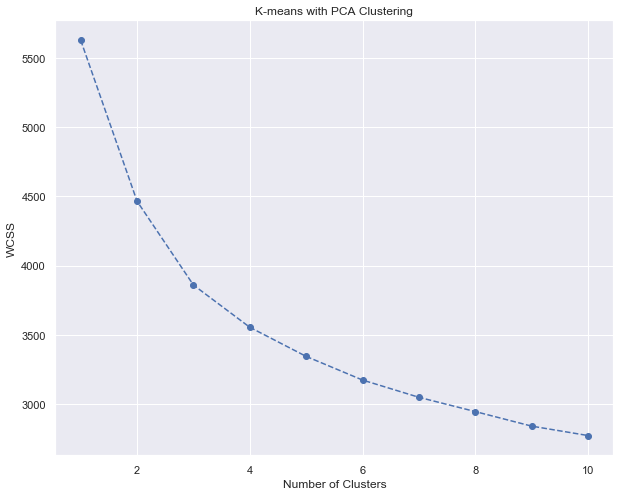

In [52]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [53]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [54]:
kmeans_pca.fit(seg_pca)

KMeans(n_clusters=4, random_state=42)

In [55]:
df_segm_pca_kmeans = pd.concat([df1.reset_index(drop = True), pd.DataFrame(seg_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-10: ] = ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5','Component 6','Component 7','Component 8','Component 9','Component 10']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [56]:
df_segm_pca_kmeans

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,...,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Segment K-means PCA
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good,...,2.759713,0.030655,-0.568349,-0.256603,-0.306553,0.153647,0.724119,-0.240851,0.155059,2
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad,...,-1.679509,0.350034,-0.941174,-0.834576,0.993654,0.108862,0.470728,0.242006,-0.093783,3
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,good,...,1.412548,-0.173975,0.144854,0.420096,0.590704,-0.403075,-0.478637,0.073391,0.375582,2
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good,...,0.765788,0.246681,-0.394400,-0.125398,-0.602301,-1.026951,-0.065449,-1.007788,-0.413390,3
4,53,male,skilled,free,little,little,4870,24,car,bad,...,1.443898,1.428076,-0.333546,0.152979,-1.155266,-0.148262,0.098609,0.069548,0.020986,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled and resident,own,little,NaN,1736,12,furniture/equipment,good,...,-0.419366,-0.050210,0.713685,-0.380618,0.942584,-0.720076,-0.513599,0.289625,0.105370,0
996,40,male,highly skilled,own,little,little,3857,30,car,good,...,0.587600,0.248856,-0.087162,0.643204,0.054745,-0.439287,-0.882974,0.143865,-0.810630,1
997,38,male,skilled,own,little,NaN,804,12,radio/TV,good,...,0.312889,-0.713925,-0.610388,0.133289,0.036917,-0.584750,0.257098,-0.042136,0.399197,1
998,23,male,skilled,free,little,little,1845,45,radio/TV,bad,...,-1.324342,0.637922,-1.951907,-0.150706,-0.467896,-0.001379,-0.773601,-0.521679,0.339275,3


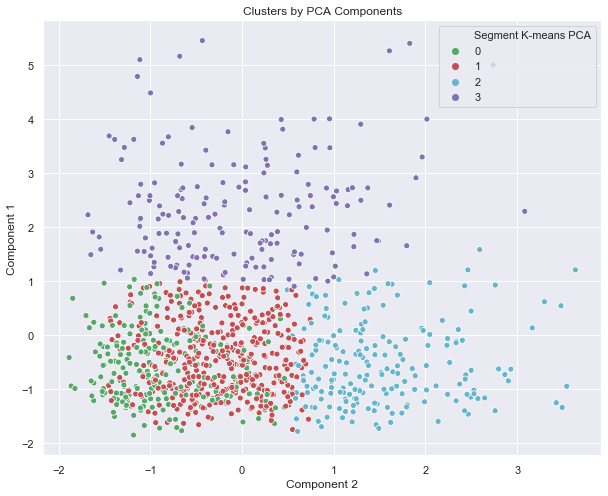

In [57]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment K-means PCA'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [58]:
# K-means Cluster:3 
kmeans_pca3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [59]:
kmeans_pca3.fit(seg_pca)

KMeans(n_clusters=3, random_state=42)

In [60]:
df_segm_pca_kmeans3 = pd.concat([df1.reset_index(drop = True), pd.DataFrame(seg_pca)], axis = 1)
df_segm_pca_kmeans3.columns.values[-10: ] = ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5','Component 6','Component 7','Component 8','Component 9','Component 10']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans3['Segment K-means PCA'] = kmeans_pca3.labels_

In [61]:
df_segm_pca_kmeans3

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,...,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Segment K-means PCA
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good,...,2.759713,0.030655,-0.568349,-0.256603,-0.306553,0.153647,0.724119,-0.240851,0.155059,2
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad,...,-1.679509,0.350034,-0.941174,-0.834576,0.993654,0.108862,0.470728,0.242006,-0.093783,0
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,good,...,1.412548,-0.173975,0.144854,0.420096,0.590704,-0.403075,-0.478637,0.073391,0.375582,2
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good,...,0.765788,0.246681,-0.394400,-0.125398,-0.602301,-1.026951,-0.065449,-1.007788,-0.413390,0
4,53,male,skilled,free,little,little,4870,24,car,bad,...,1.443898,1.428076,-0.333546,0.152979,-1.155266,-0.148262,0.098609,0.069548,0.020986,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled and resident,own,little,NaN,1736,12,furniture/equipment,good,...,-0.419366,-0.050210,0.713685,-0.380618,0.942584,-0.720076,-0.513599,0.289625,0.105370,1
996,40,male,highly skilled,own,little,little,3857,30,car,good,...,0.587600,0.248856,-0.087162,0.643204,0.054745,-0.439287,-0.882974,0.143865,-0.810630,2
997,38,male,skilled,own,little,NaN,804,12,radio/TV,good,...,0.312889,-0.713925,-0.610388,0.133289,0.036917,-0.584750,0.257098,-0.042136,0.399197,1
998,23,male,skilled,free,little,little,1845,45,radio/TV,bad,...,-1.324342,0.637922,-1.951907,-0.150706,-0.467896,-0.001379,-0.773601,-0.521679,0.339275,0


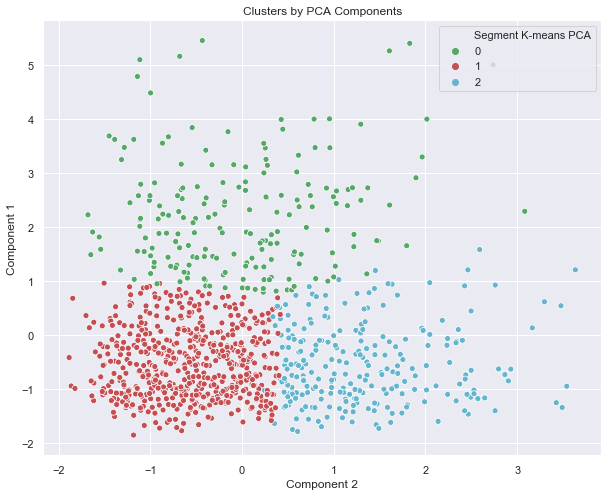

In [62]:
x_axis = df_segm_pca_kmeans3['Component 2']
y_axis = df_segm_pca_kmeans3['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans3['Segment K-means PCA'], palette = ['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()